<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 16: Classifying Names via NBC </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

The goal of this lecture will be to use Naive Bayes Classifier to classify a given name as male or female name. We will use the dataset of names found in NLTK library.

In [154]:
import nltk
import random

In [155]:
from nltk.corpus import names
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\valmir.bucaj\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [156]:
names.fileids()

['female.txt', 'male.txt']

In [157]:
females=names.words('female.txt')
males=names.words('male.txt')

In [158]:
females[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

In [159]:
males[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

Before we can build and train our model, we have to decide on a criterion according to which we'll decide if a name is male or female. Let's have a look at the last letter of each name. We will plot the conditional frequency of the number of times a last letter appears in the name for males and females.

In [160]:
import matplotlib.pyplot as plt

In [161]:
cfd=nltk.ConditionalFreqDist((fileid,word[-1]) for fileid in names.fileids() for word in names.words(fileid))

In [162]:
cfd['female.txt']

FreqDist({'a': 1773, 'e': 1432, 'y': 461, 'n': 386, 'i': 317, 'l': 179, 'h': 105, 's': 93, 't': 68, 'r': 47, ...})

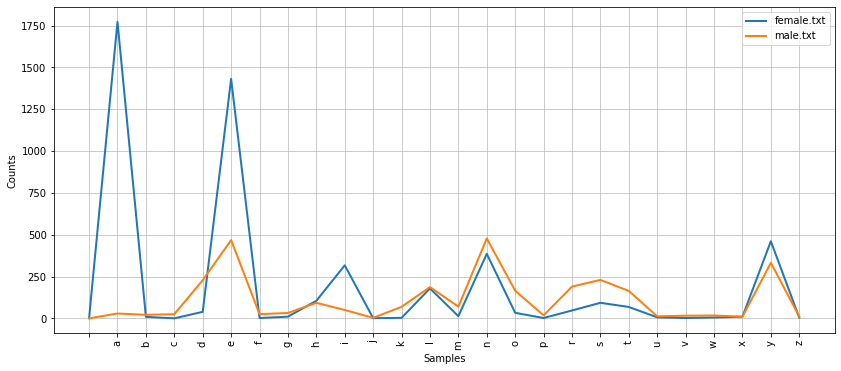

In [163]:
plt.figure(figsize=(14,6))
cfd.plot()
#plt.xticks(fontsize=14)
plt.show()

From the graph we can see that this approach, while not the best, may yeild somewhat good results. So, we're going to try this approach, and then later your job will be to imporove upon it, that is, build a better model. 

Let's do some feature generation. Essentially we will generate a list of pairs, where each pair consists of a name and its label, male or female.

In [164]:
name_list=[(name,'male') for name in males]+[(name,'female') for name in females]

In [165]:
name_list[-15:]

[('Zitella', 'female'),
 ('Zoe', 'female'),
 ('Zola', 'female'),
 ('Zonda', 'female'),
 ('Zondra', 'female'),
 ('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [166]:
name_list[:15]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male')]

Next, we will only select the last letter of the name:

In [167]:
name_features=[({'letter':name[-1]},gender) for (name,gender) in name_list]

In [168]:
name_features[:15]

[({'letter': 'r'}, 'male'),
 ({'letter': 'n'}, 'male'),
 ({'letter': 'y'}, 'male'),
 ({'letter': 'e'}, 'male'),
 ({'letter': 't'}, 'male'),
 ({'letter': 't'}, 'male'),
 ({'letter': 'y'}, 'male'),
 ({'letter': 'l'}, 'male'),
 ({'letter': 'l'}, 'male'),
 ({'letter': 'm'}, 'male'),
 ({'letter': 'h'}, 'male'),
 ({'letter': 'e'}, 'male'),
 ({'letter': 'l'}, 'male'),
 ({'letter': 'd'}, 'male'),
 ({'letter': 'r'}, 'male')]

In [169]:
name_features[-15:]

[({'letter': 'a'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'h'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'a'}, 'female')]

Next, we randomly split it in a train and test set

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
train_set,test_set=train_test_split(name_features,test_size=0.3)

In [172]:
train_set[:10]

[({'letter': 'l'}, 'male'),
 ({'letter': 'f'}, 'male'),
 ({'letter': 'n'}, 'male'),
 ({'letter': 'n'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'y'}, 'male'),
 ({'letter': 'n'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'e'}, 'male'),
 ({'letter': 'n'}, 'male')]

In [173]:
test_set[:10]

[({'letter': 'e'}, 'male'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'y'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'e'}, 'female'),
 ({'letter': 'e'}, 'male'),
 ({'letter': 'y'}, 'female'),
 ({'letter': 'a'}, 'female'),
 ({'letter': 'n'}, 'female')]

Now, we are in a position to use Naive Bayes Classifier to build our model:

In [174]:
nbc=nltk.NaiveBayesClassifier.train(train_set)

Let's test the model using some names that we know are male or female names:

In [175]:
'Humphries' in males

False

In [176]:
nbc.classify({'letter':'s'})

'male'

In [177]:
'Valmir' in males

False

In [178]:
nbc.classify({'letter':'r'})

'male'

In [179]:
'Ronasia' in females

False

In [180]:
nbc.classify({'letter':'a'})

'female'

Let's check the overall accuracy score by testing how the model is doing on the test_set:

In [181]:
nltk.classify.accuracy(nbc,test_set)

0.7537751677852349

Before we  move try to improve the model, let's first get a sense of model's variability

In [182]:
acc_score=[]
for i in range(100):
    train_set,test_set=train_test_split(name_features,test_size=0.3, random_state=i)
    nbc=nltk.NaiveBayesClassifier.train(train_set)
    acc_score.append(nltk.classify.accuracy(nbc,test_set))
    
    

In [183]:
import seaborn as sns
import numpy as np

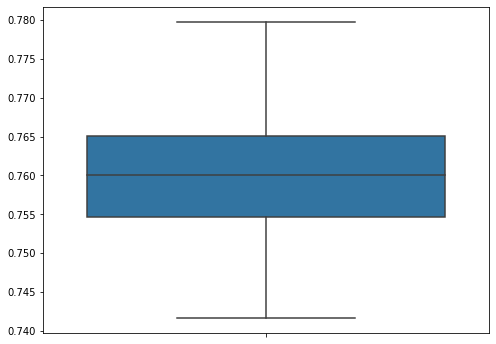

In [184]:
plt.figure(figsize=(8,6))
sns.boxplot(acc_score, orient='v')


From the boxplot it seems that the model has a relatively small variability. 

<font color='red' size=5>Exercise</font>

Build a better model! Try to generate features in a different way and see if you can get a model that performs better than the one we just built.

In [190]:
name_features2=[({'pair':name[-2:],'letter':name[-1],'trio':name[-3:]},gender) for (name,gender) in name_list]

In [191]:
name_features2[:10]

[({'pair': 'ir', 'letter': 'r', 'trio': 'mir'}, 'male'),
 ({'pair': 'on', 'letter': 'n', 'trio': 'ron'}, 'male'),
 ({'pair': 'ey', 'letter': 'y', 'trio': 'bey'}, 'male'),
 ({'pair': 'ie', 'letter': 'e', 'trio': 'bie'}, 'male'),
 ({'pair': 'ot', 'letter': 't', 'trio': 'bot'}, 'male'),
 ({'pair': 'tt', 'letter': 't', 'trio': 'ott'}, 'male'),
 ({'pair': 'by', 'letter': 'y', 'trio': 'bby'}, 'male'),
 ({'pair': 'el', 'letter': 'l', 'trio': 'del'}, 'male'),
 ({'pair': 'ul', 'letter': 'l', 'trio': 'dul'}, 'male'),
 ({'pair': 'im', 'letter': 'm', 'trio': 'rim'}, 'male')]

In [192]:
train_set,test_set=train_test_split(name_features2,test_size=0.3, random_state=2)

In [193]:
test_set[:10]

[({'pair': 'na', 'letter': 'a', 'trio': 'ena'}, 'female'),
 ({'pair': 'la', 'letter': 'a', 'trio': 'lla'}, 'female'),
 ({'pair': 'on', 'letter': 'n', 'trio': 'non'}, 'male'),
 ({'pair': 'ne', 'letter': 'e', 'trio': 'one'}, 'male'),
 ({'pair': 'na', 'letter': 'a', 'trio': 'ina'}, 'female'),
 ({'pair': 'te', 'letter': 'e', 'trio': 'tte'}, 'female'),
 ({'pair': 'im', 'letter': 'm', 'trio': 'him'}, 'male'),
 ({'pair': 'et', 'letter': 't', 'trio': 'net'}, 'female'),
 ({'pair': 'dy', 'letter': 'y', 'trio': 'ddy'}, 'female'),
 ({'pair': 'eo', 'letter': 'o', 'trio': 'Geo'}, 'male')]

In [194]:
nbc2=nltk.NaiveBayesClassifier.train(train_set)

In [195]:
nbc2.classify({'letter':'r','pair':'ir'})

'male'

In [196]:
nltk.classify.accuracy(nbc2,test_set)

0.7869127516778524

In [197]:
acc_score2=[]
for i in range(100):
    train_set,test_set=train_test_split(name_features2,test_size=0.3, random_state=i)
    nbc=nltk.NaiveBayesClassifier.train(train_set)
    acc_score2.append(nltk.classify.accuracy(nbc,test_set))
    
    

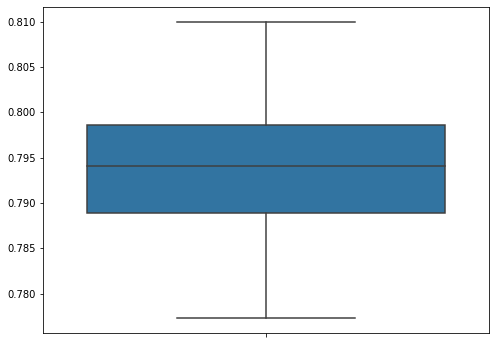

In [198]:
plt.figure(figsize=(8,6))
sns.boxplot(acc_score2, orient='v')
